In [13]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [14]:
#Importar el dataset y procesar valores vacíos
df = pd.read_csv('datasets/Heart_Disease_Dataset.csv', sep=";")

res = df.columns
for col in res:
    print(col, df[col].isna().mean())

# Limpiar dataset
df = df.dropna()


Unnamed: 0 0.0
Age 0.0196078431372549
Sex 0.007625272331154684
ChestPainType 0.014161220043572984
RestingBP 0.014161220043572984
Cholesterol 0.020697167755991286
FastingBS 0.010893246187363835
RestingECG 0.006535947712418301
MaxHR 0.016339869281045753
ExerciseAngina 0.0032679738562091504
Oldpeak 0.008714596949891068
ST_Slope 0.002178649237472767
HeartDisease 0.0196078431372549


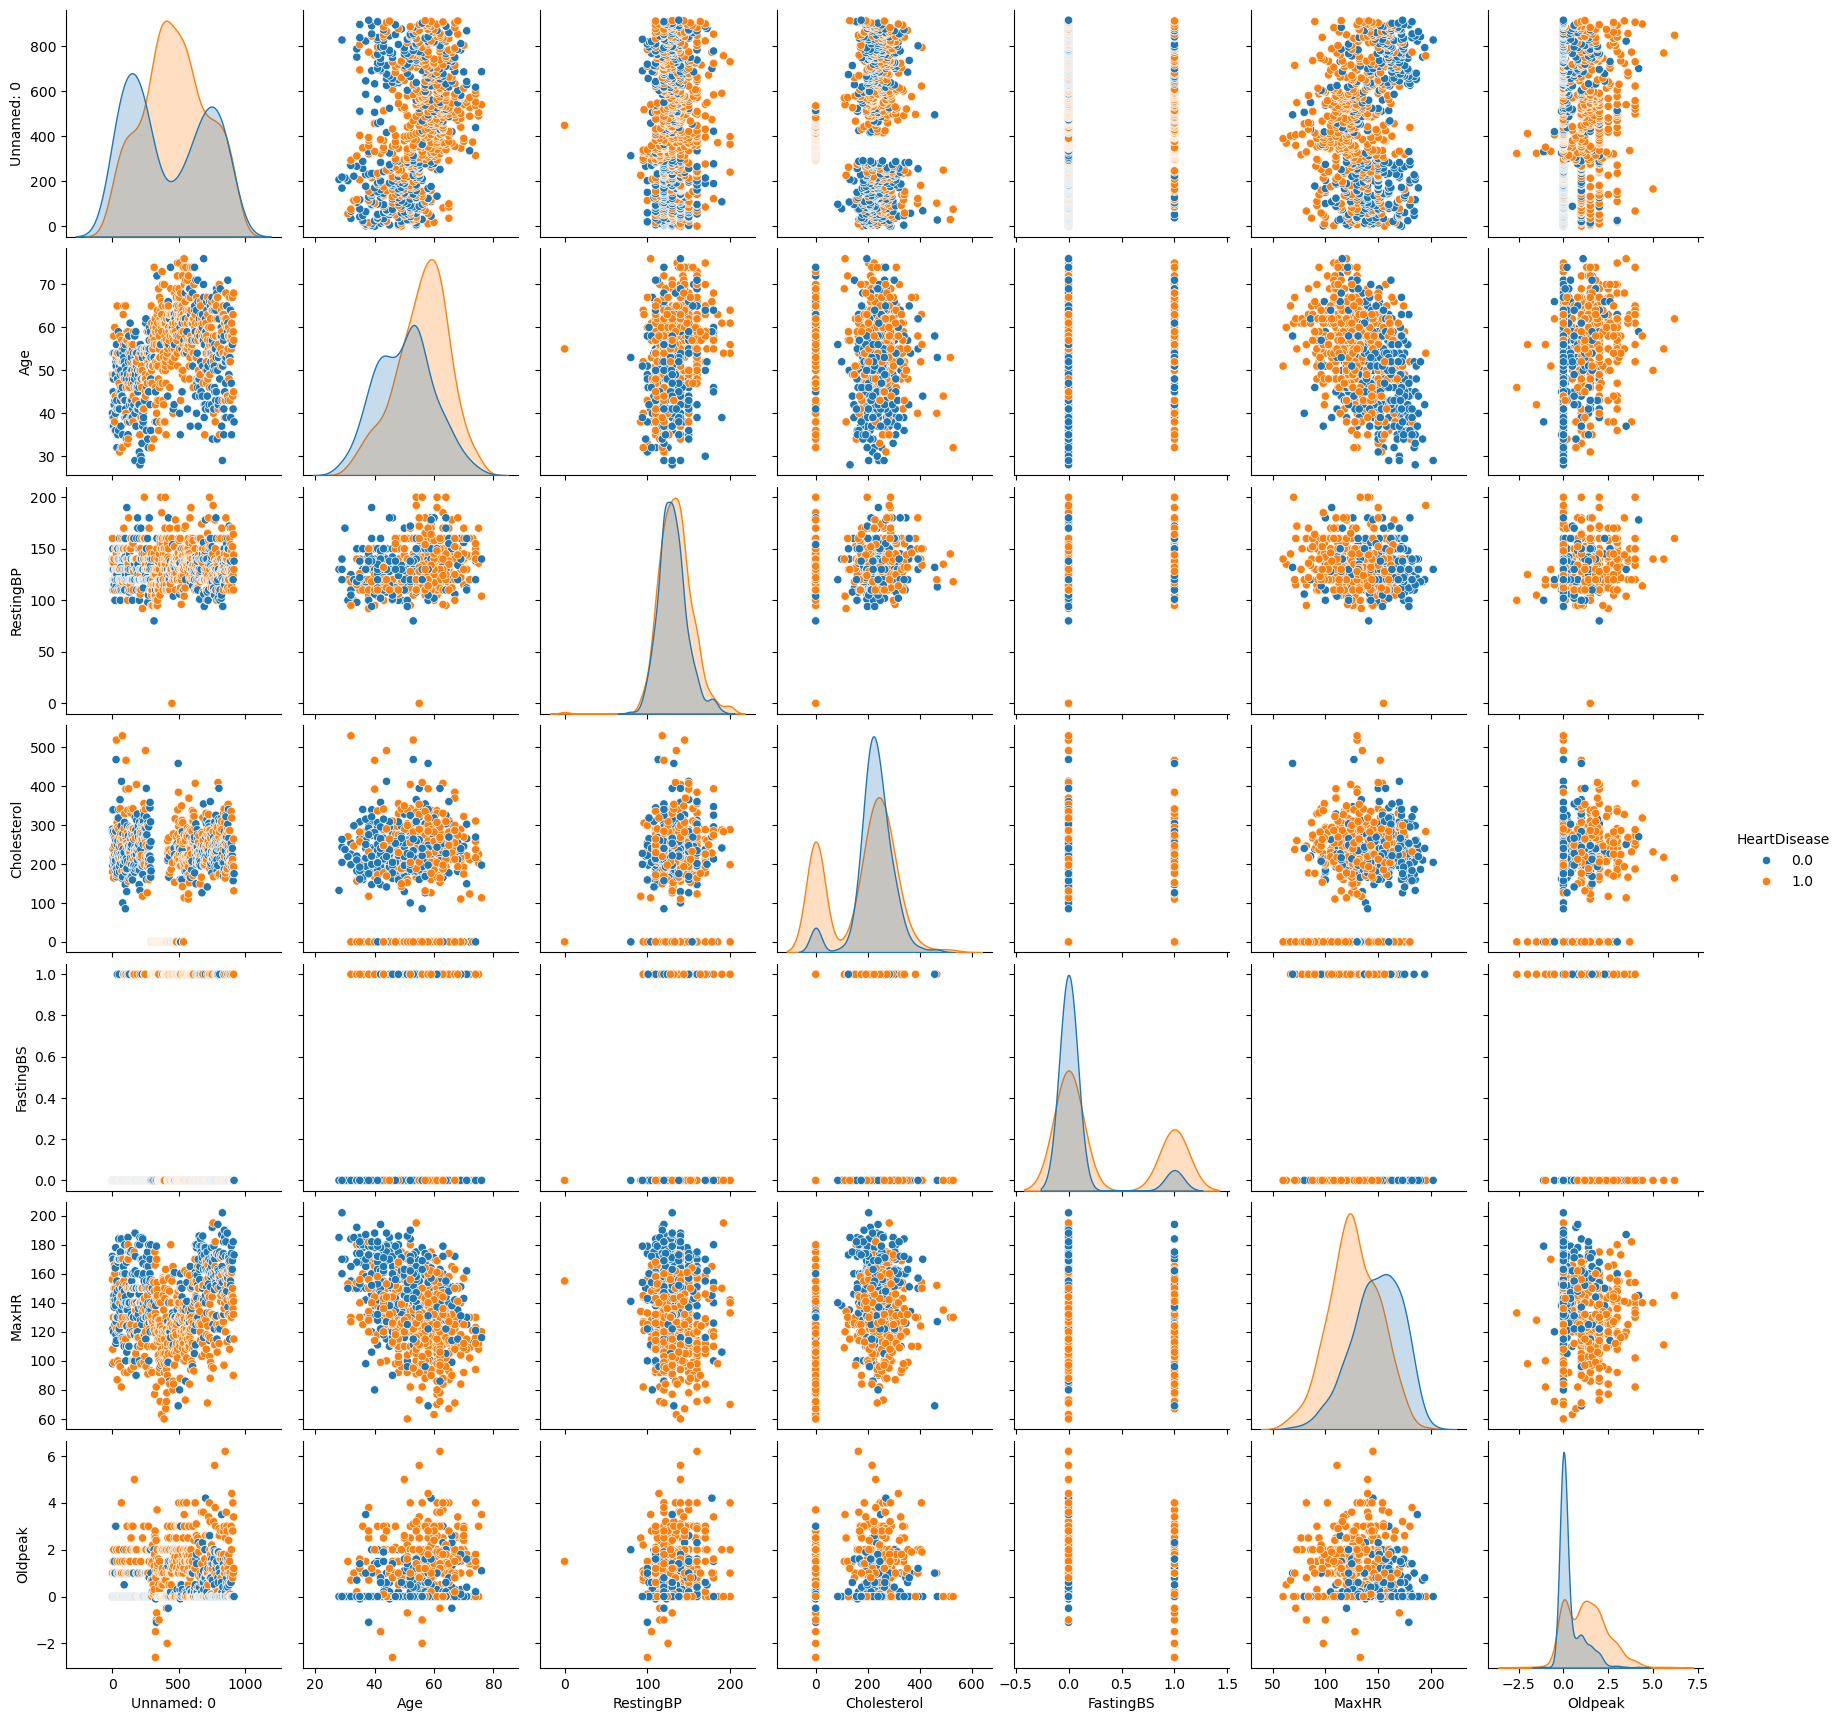

In [15]:
# Grafica par a par de las variables
sns.pairplot(df, hue="HeartDisease")

Se eligieron las siguientes variables independientes usando tres criterios, primero elegí variables que yo sé pueden tener relación con enfermedades del corazón, como el colesterol, dolor de pecho, la presión en reposo o el azucar en la sangre, sin embargo con las pruebas me di cuenta que puede que elegirlas arbitriariamente no era la mejor opción, por lo que tuve que ir ajustando y cambiando columnas hasta obtener un resultado satisfractorio, decidí probar primero con las columnas que tuvieran menor cantidad de datos vacíos, ayudandome de la gráfica par a par para ver cómo están estructuradas cada una.

In [ ]:
#Elegir variables independientes
variablex = df[["ExerciseAngina", "Age", "RestingBP", "ChestPainType", "FastingBS", "ST_Slope"]].values
variabley = df["HeartDisease"]

#convert excercise angina to binary
variablex[:,0] = np.where(variablex[:,0] == 'y', 1, 0)
# convert st_slope from Up, Flat and Down to 1, 2 and 3
variablex[:,5] = np.where(variablex[:,5] == 'Up', 1, variablex[:,5])
variablex[:,5] = np.where(variablex[:,5] == 'Flat', 2, variablex[:,5])
variablex[:,5] = np.where(variablex[:,5] == 'Down', 3, variablex[:,5])
# convert chest pain type from “ATA”, “NAP”,“ASY”, “TA” to 1, 2, 3 and 4
variablex[:,3] = np.where(variablex[:,3] == 'ATA', 1, variablex[:,3])
variablex[:,3] = np.where(variablex[:,3] == 'NAP', 2, variablex[:,3])
variablex[:,3] = np.where(variablex[:,3] == 'ASY', 3, variablex[:,3])
variablex[:,3] = np.where(variablex[:,3] == 'TA', 4, variablex[:,3])

x_train, x_test, y_train, y_test = train_test_split(variablex, variabley, test_size=0.25, random_state=420)

El dataset se limpió a la par de la selección de variables independientes, pues primero me interesaba conocer cuantos datos nulos tenía cada columna, para utilizar este dato como un criterio más al momento de elegir las variables
Se usó **75%** en datos de entrenamiento y **25%** en datos de pruebas, también se intentó entrenar con 80%, 85% y 70%, sin embargo dieron peores resultados


Se eligió el random state porque tenemos una gran cantidaddd de registros y 420 es un número gracioso

In [ ]:
# Crear y entrenar modelo
model = RandomForestClassifier(criterion='gini',
                               max_features='sqrt',
                               bootstrap=True,
                               max_samples=2/4,
                               oob_score=True, 
                               max_depth=7)
model.fit(x_train, y_train)

# Puntajes
print(f"El puntaje obb obtenido es: {model.oob_score_*100}%")
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"El puntaje F1 obtenido es: {f1}")
percent = model.score(x_test, y_test)
print(f"El porcentaje de aciertos es: {percent*100}%")

El puntaje obb obtenido es: 85.01683501683502%
El puntaje F1 obtenido es: 0.860720118205148
El porcentaje de aciertos es: 86.4321608040201%


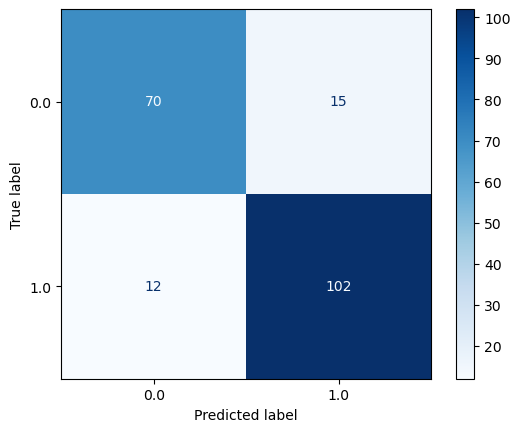

El porcentaje de verdaderos positivos es: 89.47368421052632%
El porcentaje de verdaderos negativos es: 82.35294117647058%
El porcentaje de falsos positivos es: 17.647058823529413%
El porcentaje de falsos negativos es: 10.526315789473683%


In [ ]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# calcular porcentajes
truePositivePercentage = conf_matrix[1][1] / (conf_matrix[1][0] + conf_matrix[1][1])
print(f"El porcentaje de verdaderos positivos es: {truePositivePercentage*100}%")
trueNegativePercentage = conf_matrix[0][0] / (conf_matrix[0][0] + conf_matrix[0][1])
print(f"El porcentaje de verdaderos negativos es: {trueNegativePercentage*100}%")
falsePositivePercentage = conf_matrix[0][1] / (conf_matrix[0][0] + conf_matrix[0][1])
print(f"El porcentaje de falsos positivos es: {falsePositivePercentage*100}%")
falseNegativePercentage = conf_matrix[1][0] / (conf_matrix[1][0] + conf_matrix[1][1])
print(f"El porcentaje de falsos negativos es: {falseNegativePercentage*100}%")

# Conclusiones
Conseguir un score mayor al 85% en el random forest fue una tarea que sólo necesitó de ajustes, pues desde mi primer modelo obtuve resultados mayores a .80, por lo que sólo fue cuestión de ajustar aspectos como el max depth o el porcentaje de los datos de prueba, intentando subir el score. Haciendo esto me di cuenta que sería util para alterar el score de manera leve, sin embargo si quería hacer un cambio significativo sería necesario cambiar cosas más enraizadas en el modelo como las variables independientes a elegir, este fue un proceso de prueba y error viendo cuales features funcionaban mejor para la clasificación, guiandome por el criterio que ya mencioné anteriormente al momento de elegir las columnas.
En general, siento que el modelo dio resultado satisfactorio, los puntajes están sobre un nivel satisfactorio, y viendo de manera gráfica en la matriz de confusión los TP y los TN, me doy cuenta que el modelo da los resultados esperados.